In [117]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport

sns.set()

### Reading the Data

In [118]:
data_original=pd.read_csv("donors.csv")

C:\Users\fonse\anaconda3\envs\DM-DSAA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [119]:
pd.set_option("display.max_columns",485)
pd.set_option("display.max_rows",485)

### Make a copy of the original dataset


In [120]:
data = data_original.copy()

In [121]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [122]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [123]:
# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

In [124]:
# duplicated observations
data.duplicated().sum()

0

In [125]:
# descriptive statistics
data.describe(include="all")  # try with all and without all

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,12386.000000,74126.000000,95412,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412,95412,95412,51589.000000,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000

## Normalize Values

In the columns that have X marked
0 - doesn't have X
1 - have X marked

In [126]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In the columns that have Y marked
0 - N
1 - Y

In [127]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE    94013
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

## Dropping Columns with High percentege of missing values

In [13]:
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

76 columns were removed


In [14]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,2017-02-01,74,6,14,240.0,31,14,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,

In [131]:
# check dataset data types again
data.dtypes.count()

475

In [132]:
data["TCODE"]=data["TCODE"].astype(object)
data[X_values]=data[X_values].astype(object)
data[Y_Values]=data[Y_Values].astype(object)

In [133]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [209]:
non_metric_features

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'GENDER',
 'DATASRCE',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',


## Delete columns with same values


In [229]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        if len(set(df_ohc[lista[i]])) == 1:
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [230]:
del_columns_with_one_elem(non_metric_features)

In [233]:
data[non_metric_features]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,MAXADATE,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,P,1957-12-01,0,0,0,0,0,XXXX,T2,H,M,M,M,M,F,3,1,12,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2017-06-01,2016-06-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-12-01,2015-11-01,2015-09-01,2015-08-01,2015-07-01,2015-05-01,2015-05-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-08-01,2014-06-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,P,1972-02-01,0,0,0,0,0,XXXX,S1,H,M,M,M,M,M,3,1,12,0,02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2017-06-01,2016-06-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,A1G,L1E,A1E,A1E,N1E,N1E,N1E,N1E,A1F,F1E,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-11-01,2015-09-01,2015-08-01,2015-06-01,2015-05-01,2015-04-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-08-01,2014-07-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,P,1968-01-01,0,0,0,0,0,XXXX,R2,U,M,M,M,M,M,3,1,12,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2017-06-01,2016-06-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,A1E,S4D,S4D,S3D,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-11-01,2015-09-01,2015-08-01,2015-06-01,2015-05-01,2015-04-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-07-01,2014-06-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,P,1948-01-01,0,0,0,0,0,XXXX,R2,U,M,M,M,M,F,3,1,12,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2017-06-01,2016-06-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,A1F,A1E,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-12-01,2015-09-01,2015-08-01,2015-08-01,2015-05-01,2015-05-01,2015-03-01,2015-01-01,2014-12-01,2014-11-01,2014-11-01,2014-09-01,2014-08-01,2014-07-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,E,X,X,X

## Fill missing values (Data imputation)


In [234]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [235]:
modes = data_central[non_metric_features].mode().loc[0]
modes

ODATEDW     2015-01-01
OSOURCE            MBC
TCODE                0
STATE               CA
ZIP              85351
PVASTATE             P
DOB         1968-01-01
NOEXCH               0
RECINHSE             0
RECP3                0
RECPGVG              0
RECSWEEP             0
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
CHILD03              M
CHILD07              M
CHILD12              M
CHILD18              M
GENDER               F
DATASRCE             3
SOLP3                1
SOLIH               12
MAJOR                0
GEOCODE              5
COLLECT1             0
VETERANS             0
BIBLE                0
CATLG                0
HOMEE                0
PETS                 0
CDPLAY               0
STEREO               0
PCOWNERS             0
PHOTO                0
CRAFTS               0
FISHER               0
GARDENIN             0
BOATS                0
WALKER               0
KIDSTUFF             0
CARDS                0
PLATES               0
LIFESRC    

In [236]:
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()  # checking how many NaNs we still have

0

In [237]:
#lets keep the central imputation
data = data_central.copy()

## Feature Selection with Filtering Method-Correlated Feature Remove

<AxesSubplot:>

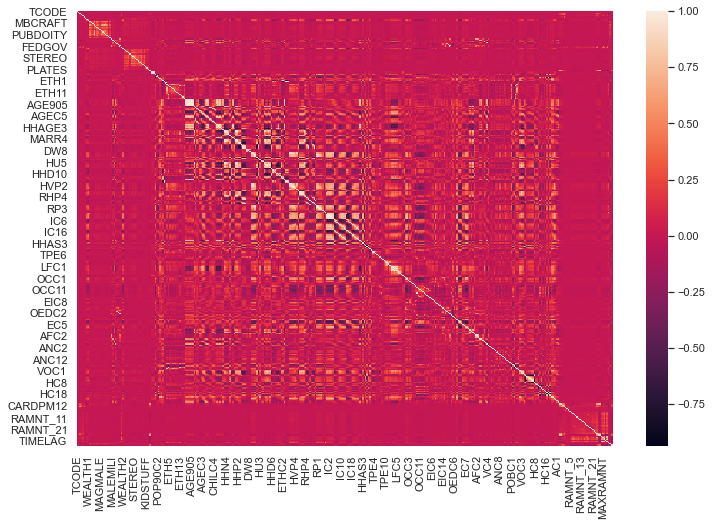

In [238]:
data_corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr)

## Feature Grouping

In [239]:
corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.75] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

165

In [240]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [241]:
for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)
correlated_group_list

[   Features1 Features2  corr_value
 0     HHAGE1    HHAGE3    0.993997
 1     HHAGE1     HHAS1    0.921519
 2     HHAGE1     AGEC6    0.905412
 3     HHAGE1     ETHC3    0.888914
 4     HHAGE1    AGE904    0.852352
 5     HHAGE1    AGE903    0.848423
 6     HHAGE1    HHAGE2    0.834608
 7     HHAGE1     AGEC7    0.823909
 8     HHAGE1    AGE905    0.821628
 9     HHAGE1    AGE902    0.819944
 10    HHAGE1    AGE906    0.815876
 11    HHAGE1    AGE901    0.791534
 12    HHAGE1     MARR3    0.775417,
   Features1 Features2  corr_value
 0       HV1       HV2    0.993412
 1       HV1      HVP1    0.924447
 2       HV1      HVP6    0.906695
 3       HV1      HVP2    0.895115
 4       HV1      HVP3    0.812556,
   Features1 Features2  corr_value
 0     ETHC5      ETH2    0.989670
 1     ETHC5     ETHC4    0.930239
 2     ETHC5     ETHC6    0.774043,
   Features1 Features2  corr_value
 0    POP902    POP901    0.988491
 1    POP902    POP903    0.977983,
   Features1 Features2  corr_value
 0

In [242]:
correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)
correlated_group

[array(['HHAGE1', 'HHAGE3', 'HHAS1', 'AGEC6', 'ETHC3', 'AGE904', 'AGE903',
        'HHAGE2', 'AGEC7', 'AGE905', 'AGE902', 'AGE906', 'AGE901', 'MARR3'],
       dtype=object),
 array(['HV1', 'HV2', 'HVP1', 'HVP6', 'HVP2', 'HVP3'], dtype=object),
 array(['ETHC5', 'ETH2', 'ETHC4', 'ETHC6'], dtype=object),
 array(['POP902', 'POP901', 'POP903'], dtype=object),
 array(['HHD7', 'HHD9'], dtype=object),
 array(['LFC5', 'LFC3', 'LFC1', 'LFC4', 'LFC2'], dtype=object),
 array(['AFC1', 'AFC2', 'AFC3'], dtype=object),
 array(['IC3', 'IC1', 'IC4', 'IC2', 'IC5', 'IC11', 'IC12', 'IC20', 'HV3'],
       dtype=object),
 array(['DW4', 'DW5', 'DW6', 'HUPA6', 'HUPA2', 'HU2', 'HU1', 'DW1', 'DW2'],
       dtype=object),
 array(['RHP2', 'RHP1', 'HUR2', 'HHD3', 'VOC2', 'DW1', 'HHD2', 'HU1'],
       dtype=object),
 array(['IC23', 'IC14', 'IC5'], dtype=object),
 array(['HHP2', 'HHP1', 'RHP3', 'HHN3', 'HHN4', 'HHD1', 'HHD2', 'HHN5',
        'HHD4', 'AGE907', 'HHD5'], dtype=object),
 array(['ETH5', 'LSC2', 'ETH13'], 

In [243]:
import random
correlated_drop = list(correlated_group)
for i in range(len(correlated_drop)):
    correlated_drop[i] = list(correlated_drop[i])
    radomIndex = random.randrange(len(correlated_drop[i])-1)
    obj = correlated_drop[i][radomIndex]
    correlated_drop[i].remove(obj)
correlated_drop

[['HHAGE1',
  'HHAS1',
  'AGEC6',
  'ETHC3',
  'AGE904',
  'AGE903',
  'HHAGE2',
  'AGEC7',
  'AGE905',
  'AGE902',
  'AGE906',
  'AGE901',
  'MARR3'],
 ['HV1', 'HV2', 'HVP1', 'HVP6', 'HVP3'],
 ['ETHC5', 'ETH2', 'ETHC6'],
 ['POP901', 'POP903'],
 ['HHD9'],
 ['LFC3', 'LFC1', 'LFC4', 'LFC2'],
 ['AFC1', 'AFC3'],
 ['IC3', 'IC1', 'IC4', 'IC5', 'IC11', 'IC12', 'IC20', 'HV3'],
 ['DW4', 'DW5', 'HUPA6', 'HUPA2', 'HU2', 'HU1', 'DW1', 'DW2'],
 ['RHP2', 'RHP1', 'HHD3', 'VOC2', 'DW1', 'HHD2', 'HU1'],
 ['IC14', 'IC5'],
 ['HHP2',
  'HHP1',
  'HHN3',
  'HHN4',
  'HHD1',
  'HHD2',
  'HHN5',
  'HHD4',
  'AGE907',
  'HHD5'],
 ['ETH5', 'ETH13'],
 ['OCC9'],
 ['AFC5'],
 ['IC10'],
 ['IC21', 'IC4'],
 ['CARDPROM', 'NGIFTALL'],
 ['HV4', 'HV3', 'RP2', 'RP3'],
 ['HC17'],
 ['HC8', 'HC6', 'HC2'],
 ['IC13'],
 ['MARR1', 'HHD3', 'HHD2', 'HU1'],
 ['NGIFTALL', 'CARDPROM'],
 ['HVP4', 'HVP5', 'RP2', 'RP1'],
 ['TPE4'],
 ['HHN5'],
 ['HHN1', 'HHD11', 'HHD2'],
 ['IC6', 'HHAS4'],
 ['RP3'],
 ['HC4', 'HC6'],
 ['IC18'],
 ['IC16'],

In [244]:
flat_list = []
for sublist in correlated_drop:
    for item in sublist:
        flat_list.append(item)
correlated_drop=flat_list

In [245]:
data.drop(correlated_drop,inplace=True, axis=1)

In [246]:
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [247]:
data.shape

(95412, 361)

## Outlier Removal

In [250]:
data_out = data.copy()
data_out

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C4,POP90C5,ETH3,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC1,CHILC4,CHILC5,HHAGE3,HHN2,HHN6,MARR2,MARR4,DW6,DW7,DW8,DW9,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC4,HVP2,HUR1,HUR2,RHP3,RHP4,HUPA3,HUPA4,HUPA5,HUPA7,RP4,MSA,ADI,DMA,IC2,IC7,IC8,IC9,IC15,IC19,IC22,IC23,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC5,AFC2,AFC4,AFC6,VC2,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC3,HC3,HC5,HC7,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,B,P,1957-12-01,0,0,0,0,0,XXXX,T2,H,M,M,M,M,1.0,4.0,F,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,39,34,18,1,1,12,0,5.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,264,0,35,47,53,0,0,0,0,0,0,0,0,0,0,0,42,27,11,14,18,17,13,12,25,18,23,33,4,7,19,0,7,7,0,96,4,7,6,2,9,3,17,50,0,7,1,61,15,4,0,14,1,0,73,0.0,177.0,682.0,318,23,23,23,4,17,0,2,4,51,46,3,88,8,0,0,0,0,0,4,1,13,16,2,45,44,62,53,99,0,0,3,8,13,9,0,3,9,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,4,0,18,0,23,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,19,5,14,54,0,0,90,0,10,0,0,0,65,40,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,74,6,14,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-12-01,2015-11-01,2015-09-01,2015-08-01,2015-07-01,2015-05-01,2015-05-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-08-01,2014-06-01,10.0,10.0,12.0,12.0,15.0,15.0,14.0,10.0,12.0,13.0,10.0,10.0,11.0,11.0,11.0,10.0,10.0,12.0,10.0,10.0,11.0,9.0,240.0,14,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,B,P,1972-02-01,0,0,0,0,0,XXXX,S1,H,M,M,M,M,1.0,6.0,M,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0

In [256]:
#Isto não está a funcionar
q25 = data_out.quantile(.25)
q75 = data_out.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_out[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
#data_out = data[filters]
#print('Percentage of data kept after removing outliers:', np.round(data_out.shape[0] / data_original.shape[0], 4))

## Data Standardization

In [248]:
standard = data.copy()

In [33]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(standard[metric_features])
scaled_feat

array([[-0.05684721, -0.01915632, -0.27488483, ..., -0.00476043,
        -1.00123751,  1.94822609],
       [-0.05579882, -0.01915632, -0.27488483, ...,  0.95428208,
        -1.00123751,  0.08384741],
       [-0.05579882, -0.01915632, -0.27488483, ..., -1.4597303 ,
         0.99876402,  1.94822609],
       ...,
       [-0.05579882, -0.01915632, -0.27488483, ...,  1.6978204 ,
         0.99876402,  1.01603675],
       [-0.05684721, -0.01915632,  3.63788723, ..., -1.64757746,
         0.99876402,  1.94822609],
       [-0.05475042, -0.01915632,  3.63788723, ...,  1.61593459,
         0.99876402, -0.84834193]])

In [34]:
standard[metric_features] = scaled_feat
standard.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE906,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN1,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HU2,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC5,HVP2,HVP5,HUR1,RHP3,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC6,IC9,IC10,IC14,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC6,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,-0.056847,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.394185,-1.235273,0.684696,-0.217719,-0.223937,-0.411007,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,0.887820,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,-0.409676,-0.076580,0.027298,-0.816497,-0.444526,0.882053,1.372488,-0.156494,-0.739032,0.465714,-0.519690,-0.321105,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.453938,-0.440457,-0.909136,-0.510811,0.337393,-0.331514,-0.637539,-0.593674,0.364485,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,-0.585640,0.626834,-0.098231,-0.191477,0.989500,0.990253,-0.483565,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.651662,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.216497,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.167262,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,-0.468939,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,-0.897802,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2

In [35]:
# Checking mean and variance of standardized variables
standard[metric_features].describe().round(2)

,TCODE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE906,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN1,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HU2,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC5,HVP2,HVP5,HUR1,RHP3,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC6,IC9,IC10,IC14,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC6,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,CARDPM12,NUMPRM12,RAMNTALL,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
count,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0

In [36]:
data = standard.copy()

## One-hot encoding

In [220]:
df_ohc =  data.copy()

In [221]:
df_ohc[non_metric_features]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,MAXADATE,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,B,P,1957-12-01,0,0,0,0,0,XXXX,T2,H,M,M,M,M,F,3,1,12,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-12-01,2015-11-01,2015-09-01,2015-08-01,2015-07-01,2015-05-01,2015-05-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-08-01,2014-06-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,B,P,1972-02-01,0,0,0,0,0,XXXX,S1,H,M,M,M,M,M,3,1,12,0,02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,A1G,L1E,A1E,A1E,N1E,N1E,N1E,N1E,A1F,F1E,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-11-01,2015-09-01,2015-08-01,2015-06-01,2015-05-01,2015-04-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-08-01,2014-07-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,B,P,1968-01-01,0,0,0,0,0,XXXX,R2,U,M,M,M,M,M,3,1,12,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,A1E,S4D,S4D,S3D,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-11-01,2015-09-01,2015-08-01,2015-06-01,2015-05-01,2015-04-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-07-01,2014-06-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,B,P,1948-01-01,0,0,0,0,0,XXXX,R2,U,M,M,M,M,F,3,1,12,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,A1F,A1E,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-12-01,2015-09-01,2015-08-01,2015-08-01,2015-05-01,2015-05-01,2015-03-01,2015

In [156]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features].astype(str))
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

MemoryError: Unable to allocate 17.8 GiB for an array with shape (95412, 25007) and data type float64

## Dimensionality Reduction

In [63]:
df_pca = data.copy()

In [64]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
cov_matrix = df_pca[metric_features].cov()
pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
             index=df_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221
0,1.920522,-3.578841,-0.621526,0.899701,1.246294,2.374392,-0.984547,-1.483827,0.392104,-1.124993,1.744866,-1.753653,0.445803,0.314749,0.861831,0.836657,-0.146250,0.812231,1.210708,-0.348645,-0.353948,-1.326292,-1.149718,-2.188225,-0.080840,0.057440,-0.806677,0.844126,0.044385,-0.130310,-2.054460,0.000238,0.006918,-0.618731,-0.357800,0.350296,0.254622,-0.134842,0.769342,-0.110706,-0.695524,-0.221985,-0.235806,0.193154,0.159844,1.195446,-0.821287,0.015901,0.116496,0.664516,0.374290,0.343428,0.607863,0.400621,0.639889,0.376908,-0.472131,-0.702998,-0.244174,-0.545695,-0.305187,1.036549,0.252062,-0.544065,0.522274,0.757832,-0.508821,-0.891704,-0.352204,-0.502635,-0.174885,-0.015218,-0.895351,0.528679,-1.050825,-0.433014,0.230932,0.060823,-0.484100,-1.454170,0.041317,-0.127036,0.214887,0.314868,0.192771,0.817686,0.059548,-0.493136,0.859861,-1.389536,1.541649,1.803566,-0.049367,-0.195482,0.421938,-0.754832,0.285069,-0.506227,-0.568857,0.160172,0.487758,-0.187802,0.581839,-0.044599,0.544525,-0.836926,0.044650,0.105957,0.286259,-0.925866,0.308431,-0.303161,-0.198157,-0.322459,-0.545186,0.392694,-0.082838,-0.879549,-0.287770,0.035166,0.292530,0.184067,-0.240210,-0.043063,-0.701336,0.516844,0.362742,0.623965,0.248773,0.601594,0.231360,-0.067761,0.254025,0.183443,-0.243119,0.061502,0.465167,-0.620022,-0.222434,0.840147,0.023287,-0.172088,0.391682,1.272592,-0.339633,-0.347267,-0.703620,0.198560,1.121927,-0.553957,0.073175,0.488658,-0.161963,0.420072,-0.626067,0.310368,0.543720,-0.552960,-0.273436,-0.211528,-0.623235,0.015542,0.049220,-1.214590,-0.135880,0.550451,-0.129152,-0.256526,0.196296,-0.279636,-0.234692,-0.028363,-0.438852,-0.315100,0.232391,-0.514409,0.630908,-0.310136,0.507124,0.154439,0.213150,0.328578,0.179372,0.191583,0.014839,-0.491147,0.047130,0.047928,0.032218,-0.150835,0.568630,-0.017711,0.270056,0.022769,0.249671,-0.101258,0.193153,0.536182,-0.430451,-0.088002,0.395610,0.057610,0.016362,-0.000760,0.102346,0.045102,0.196112,0.100683,-0.054362,-0.125077,-0.012048,0.016525,-0.021151,0.021981,0.074512,-0.060572,0.013709,0.011625,0.000923,0.009611,-0.000600,0.000548
1,-10.783856,1.944986,-2.095315,7.461341,5.337236,-4.380076,4.206193,-1.427248,-1.472193,0.811964,0.314743,-2.174134,-0.027027,2.512584,4.505453,-1.798769,-0.334698,0.551088,-2.078534,-1.300377,-0.181472,-1.417290,-0.797404,1.752077,0.975293,0.529206,-5.503464,-0.039979,-2.093474,-0.805693,1.856780,1.891511,-0.702267,1.161300,1.774631,0.622435,1.256750,-1.524427,-2.603476,2.196084,0.279644,0.282482,1.225789,-0.088703,1.844548,-1.532077,-0.979776,-1.252218,1.592610,0.018567,-0.349068,3.952287,-0.429996,2.253433,0.319387,-0.155232,1.274187,1.649137,-1.950719,-0.350636,-1.088889,0.378646,-0.682153,2.305535,-0.024792,0.549613,-1.684655,-0.334511,0.157598,0.000335,0.73963

In [65]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,18.748166,0.000000,0.084450,0.084450
2,14.158801,-4.589365,0.063778,0.148228
3,10.845045,-3.313755,0.048851,0.197079
4,7.595252,-3.249793,0.034212,0.231292
5,6.793089,-0.802163,0.030599,0.261891
6,6.072007,-0.721082,0.027351,0.289242
7,5.324858,-0.747149,0.023986,0.313227
8,4.617664,-0.707194,0.020800,0.334028
9,4.344268,-0.273396,0.019569,0.353596
10,3.673966,-0.670302,0.016549,0.370145


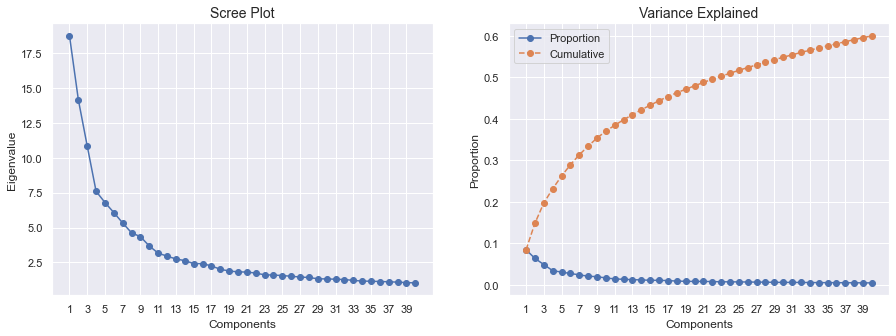

In [72]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [73]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=9)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.920522,-3.578843,-0.621532,0.899683,1.246255,2.373178,-0.984868,-1.476531,0.393244
1,-10.783856,1.944988,-2.095335,7.461429,5.337166,-4.380169,4.205006,-1.425530,-1.478816
2,5.435361,-3.889157,-1.802304,-0.224569,-0.053753,0.258657,0.833902,-2.404667,-2.341152
3,3.918002,2.609999,-1.231122,2.942776,2.253682,-4.608881,3.852406,-1.088327,-0.756630
4,4.746614,0.794886,0.101685,0.349088,4.816128,2.493442,0.022861,7.064293,2.492211
...,...,...,...,...,...,...,...,...,...
95407,-3.190619,3.065951,-2.573824,-1.433567,-3.018145,-0.696633,1.520319,0.003285,4.104351
95408,-7.098069,-1.673803,-2.494460,2.501878,-1.929609,-1.337623,2.615911,-1.596113,-0.084445
95409,1.796685,2.846007,-2.409947,-0.092511,-1.113535,4.812826,0.482026,-0.303151,2.840529
95410,-4.975232,0.352866,-2.360342,2.479453,1.923329,0.926595,0.272917,-1.137902,0.894235
